In [1]:
#denoising with median

In [22]:
import os,glob,cv2
from matplotlib import pyplot as plt
from skimage.filters import gaussian,sobel,unsharp_mask,median
from skimage.morphology import disk
import numpy as np

from skimage.restoration import denoise_bilateral,denoise_nl_means,estimate_sigma,denoise_tv_chambolle

import bm3d

In [3]:

gaus=cv2.imread("Images/gaussian noise.png",0) # RGB te neya must
salt=cv2.imread("Images/salt noise.jpg",0)
median_cv2=cv2.medianBlur(gaus,(3)) # 3 dimension as for rgb
median_sk= median(gaus,disk(3),mode="constant",cval=0.0)

medians_cv2=cv2.medianBlur(salt,(3))
medians_sk= median(salt,disk(3),mode="constant",cval=0.0)


cv2.imshow("gaus",median_cv2)
cv2.imshow("gaus sk",median_sk)
cv2.imshow("salt",medians_cv2)
cv2.imshow("salt sk",medians_sk)
cv2.waitKey(0)
cv2.destroyAllWindows()
#in salt pepper works well

In [4]:
#denoising bilateral

In [5]:
bilateral_cv= cv2.bilateralFilter(salt,10,40,200,borderType= cv2.BORDER_CONSTANT)

bilateral_sk= denoise_bilateral(salt,sigma_color=0.05,sigma_spatial=15,channel_axis=None)

cv2.imshow("cv",bilateral_cv)
cv2.imshow("sk",bilateral_sk)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
#denoising NLM

In [7]:
sigma_est=np.mean(estimate_sigma(gaus,channel_axis=True))
denoise_nlm= denoise_nl_means(gaus,h=1.15*sigma_est,fast_mode=True,patch_size=5,patch_distance=3,channel_axis=None)
cv2.imshow("NLM",denoise_nlm)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
#TV_chambolle

(array([807.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.

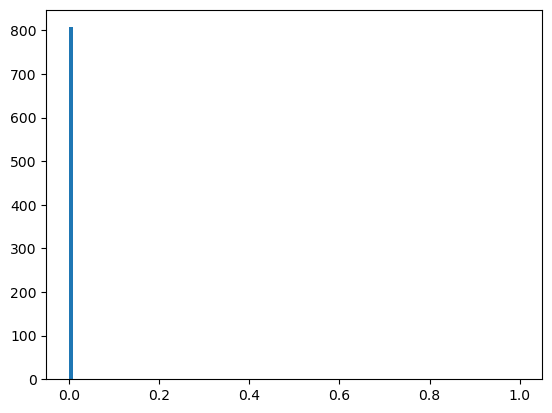

In [9]:
plt.hist(gaus.flat,bins=100,range=(0,1))

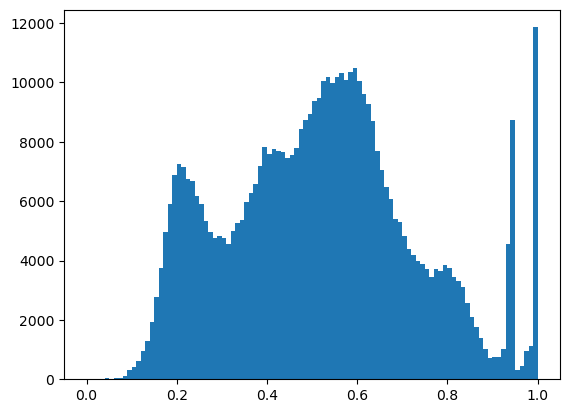

In [10]:
denoise_tv=denoise_tv_chambolle(gaus, weight=0.1, eps=0.0002, channel_axis=False)
plt.hist(denoise_tv.flat,bins=100,range=(0,1))
cv2.imshow("TV",denoise_tv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
#BM3D

In [13]:
from skimage import io,img_as_float
img=img_as_float(io.imread("Images/sigma.jpg",0))
denoise_bm3d=bm3d.bm3d(img,sigma_psd=0.2,stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

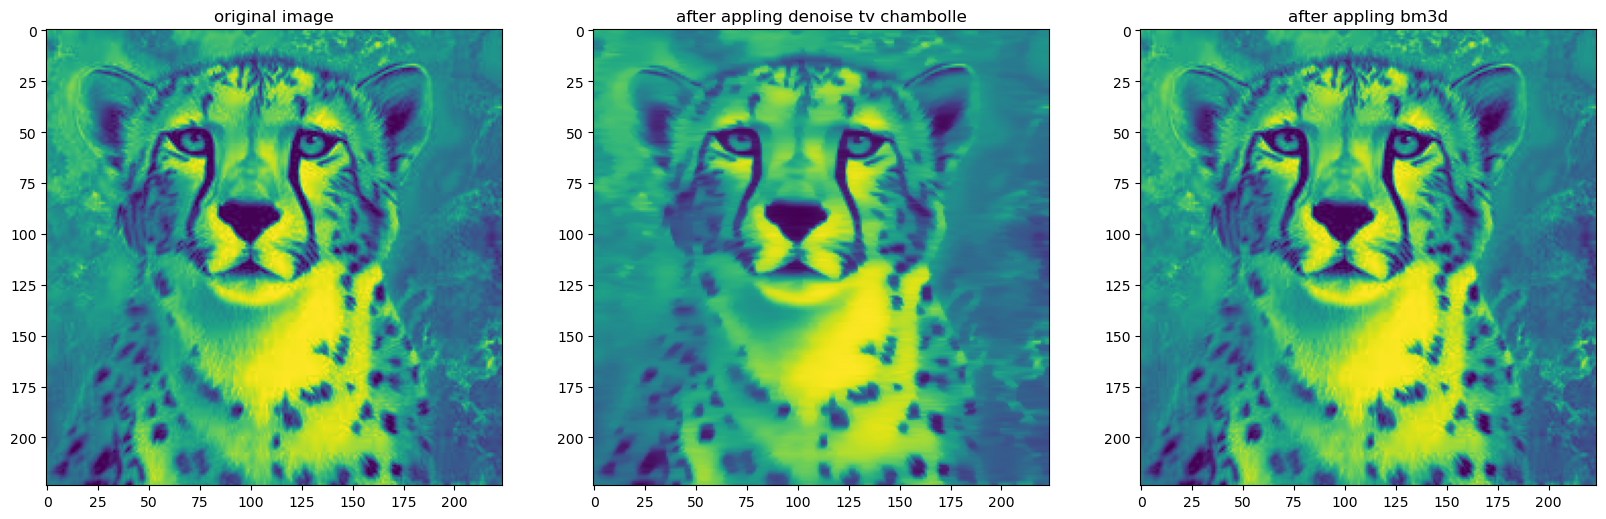

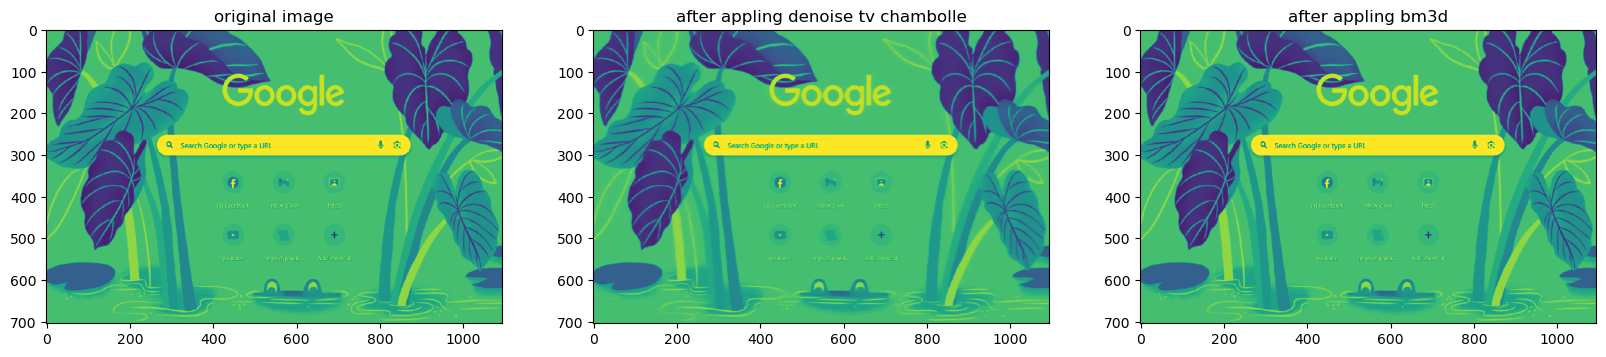

In [26]:
img=(cv2.imread("Images/tiger.jpg",0)) 
fig=plt.figure(figsize=(20,20))

v1=denoise_tv_chambolle(img, weight=0.1, eps=0.0002, channel_axis=False) 
b1=bm3d.bm3d(img, sigma_psd=0.2,stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

i1=fig.add_subplot(2,3,1) 
i1.set_title('original image') 
i1.imshow(img) 
i2=fig.add_subplot(2,3,2)
i2.set_title('after appling denoise tv chambolle') 
i2.imshow(v1)
i3=fig.add_subplot(2,3,3)

i3.set_title('after appling bm3d') 
i3.imshow(b1)


img1=(cv2.imread("Images/ss.png",0)) 
fig=plt.figure(figsize=(20,20))

v1=denoise_tv_chambolle(img1, weight=0.1, eps=0.0002, channel_axis=False) 
b1=bm3d.bm3d(img1, sigma_psd=0.2,stage_arg=bm3d.BM3DStages.HARD_THRESHOLDING)

i1=fig.add_subplot(2,3,4) 
i1.set_title('original image') 
i1.imshow(img1) 
i2=fig.add_subplot(2,3,5)
i2.set_title('after appling denoise tv chambolle') 
i2.imshow(v1)
i3=fig.add_subplot(2,3,6) 
i3.set_title('after appling bm3d') 
i3.imshow(b1)